<a href="https://colab.research.google.com/github/ADv0rnik/Data-analysis-for-JER/blob/main/Holt_winters_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Data for JER/Weekly_index03-20.csv'
df = pd.read_csv(path, parse_dates=['Date'])
print(df.shape)
df.head()

(932, 3)


,Date,Conc,w_i
0,2003-01-05,26.200000,1.837894
1,2003-01-12,34.428571,2.415117
2,2003-01-19,9.428571,0.661401
3,2003-01-26,16.142857,1.132399
4,2003-02-02,6.833333,0.479349


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    932 non-null    datetime64[ns]
 1   Conc    929 non-null    float64       
 2   w_i     929 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 22.0 KB


In [ ]:
df.set_index('Date', inplace=True)
df.head()

,Conc,w_i
Date,,
2003-01-05,26.200000,1.837894
2003-01-12,34.428571,2.415117
2003-01-19,9.428571,0.661401
2003-01-26,16.142857,1.132399
2003-02-02,6.833333,0.479349


In [ ]:
#df['w_i'].iloc[lambda x: x == 'NaN']
df.fillna(method= 'pad', inplace=True)

In [ ]:
df.iloc[80:].head(50)

,Conc,w_i
Date,,
2004-07-18,11.285714,0.836138
2004-07-25,22.333333,1.654637
2004-08-01,22.800000,1.689211
2004-08-08,23.000000,1.704029
2004-08-15,16.285714,1.206579
2004-08-22,21.142857,1.566436
2004-08-29,18.714286,1.386508
2004-09-05,22.500000,1.666985
2004-09-12,22.500000,1.666985


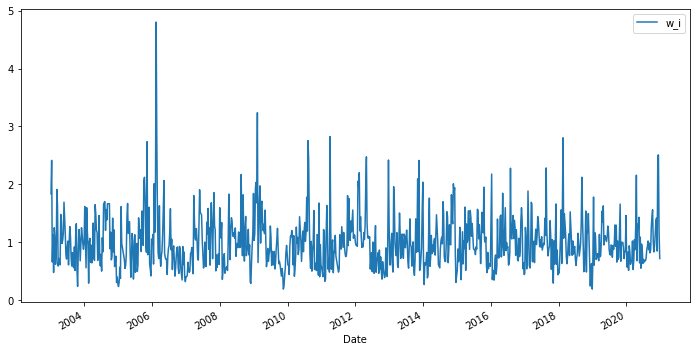

In [ ]:
df[['w_i']].plot(figsize=(12,6))

In [ ]:
df.index
df = df.asfreq('W')
#You must setup the frequency ts_log = ts_log.asfreq('W') https://stackoverflow.com/questions/64025453/attributeerror-rangeindex-object-has-no-attribute-inferred-freq

In [ ]:
df.fillna(method= 'pad', inplace=True)

# **Decomposition**

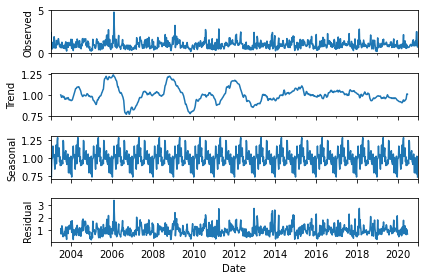

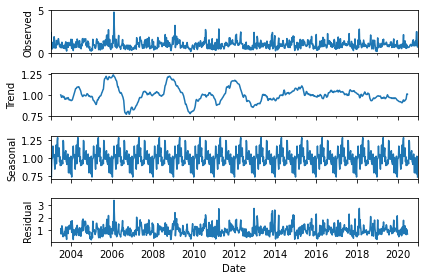

In [ ]:
decompose_result = seasonal_decompose(df['w_i'], model='multiplicative')
decompose_result.plot()

# **Holt-Winters Exponential Smoothing (HWES)**

Simple Exponential Smoothing

In [ ]:
df.index.freq = 'W'
m = 12
alpha = 1/(2*m)

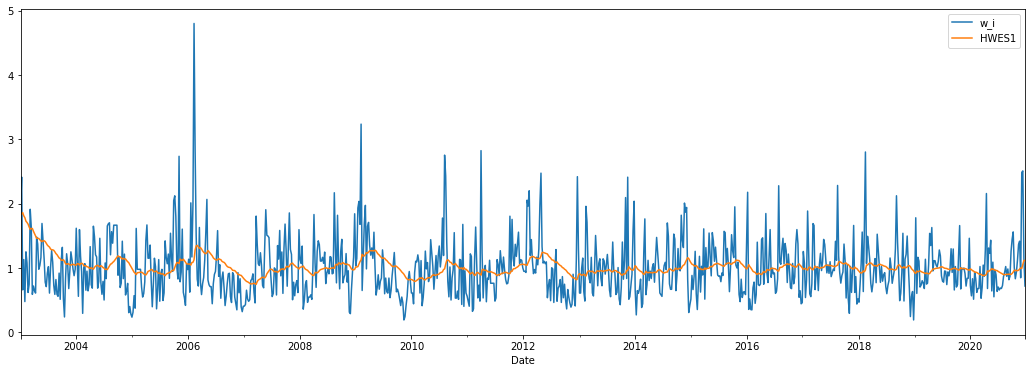

In [ ]:
df['HWES1'] = SimpleExpSmoothing(df['w_i']).fit(smoothing_level = alpha, optimized = False, use_brute= True).fittedvalues
df[['w_i','HWES1']].plot(figsize = (18,6))

Exponential Smoothing

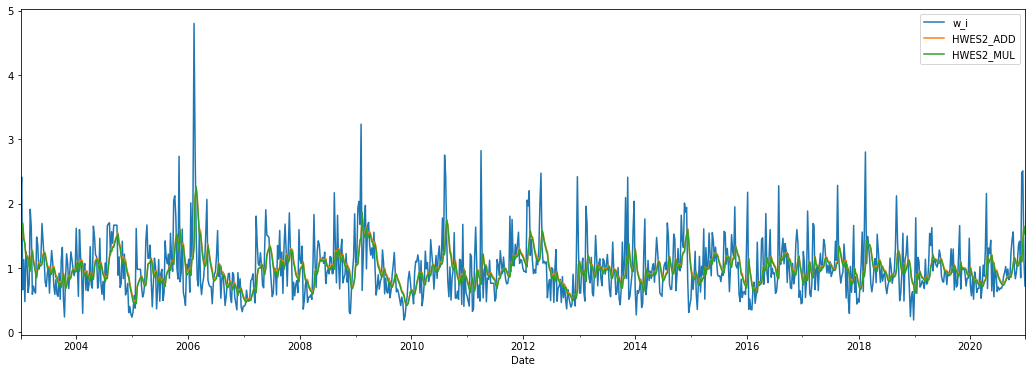

In [ ]:
df['HWES2_ADD']=ExponentialSmoothing(df['w_i'], trend='add').fit().fittedvalues
df['HWES2_MUL']=ExponentialSmoothing(df['w_i'], trend='mul').fit().fittedvalues

df[['w_i','HWES2_ADD','HWES2_MUL']].plot(figsize=(18,6))

Exponential Smoothing (Triple HWES)

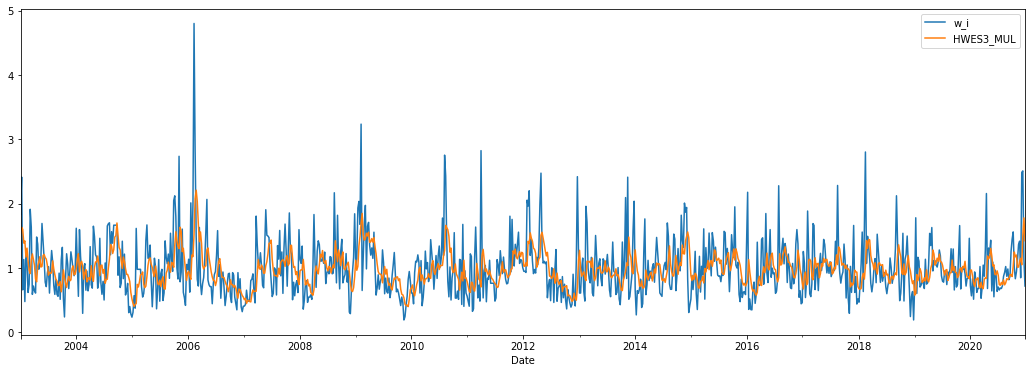

In [ ]:
df['HWES3_ADD'] = ExponentialSmoothing(df['w_i'], trend='add', seasonal='add',seasonal_periods=12).fit().fittedvalues
df['HWES3_MUL'] = ExponentialSmoothing(df['w_i'], trend='mul', seasonal='mul',seasonal_periods=12).fit().fittedvalues

df[['w_i',  'HWES3_MUL']].plot(figsize=(18,6))

# **Forecasting with Triple HWES**

In [ ]:
train_df = df[:620]
train_df.tail()

,Conc,w_i,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
Date,,,,,,,
2014-10-19,26.571429,0.973920,0.995132,1.071413,1.051865,1.040194,1.018622
2014-10-26,26.142857,0.958212,0.994248,1.050353,1.029136,1.093018,1.082968
2014-11-02,49.714286,1.822173,0.992746,1.030450,1.008104,1.054508,1.038218
2014-11-09,39.000000,1.429463,1.027306,1.201472,1.187860,1.267583,1.358519
2014-11-16,36.000000,1.319505,1.044062,1.250721,1.236983,1.216021,1.224981


In [ ]:
test_df = df[620:]
test_df.head()

,Conc,w_i,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
Date,,,,,,,
2014-11-23,54.857143,2.010674,1.055539,1.265579,1.249810,1.268924,1.219053
2014-11-30,51.000000,1.869298,1.095336,1.426529,1.416416,1.424967,1.420562
2014-12-07,53.000000,1.942604,1.127585,1.522172,1.512433,1.502084,1.489119
2014-12-14,22.571429,0.827308,1.161544,1.612991,1.602873,1.570180,1.561722
2014-12-21,8.428571,0.308932,1.147617,1.443274,1.419469,1.502467,1.472825


In [ ]:
train1_df= df[574:]
train1_df.head()

,Conc,w_i,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
Date,,,,,,,
2014-01-05,17.714286,0.649280,1.036970,1.304916,1.295052,1.283681,1.283461
2014-01-12,7.428571,0.272279,1.020816,1.163290,1.142348,1.115170,1.097652
2014-01-19,17.714286,0.649280,0.989627,0.970821,0.939504,1.025441,0.953008
2014-01-26,16.571429,0.607391,0.975446,0.901364,0.869084,0.929686,0.889702
2014-02-02,18.428571,0.675461,0.960110,0.837862,0.805465,0.766675,0.719422


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


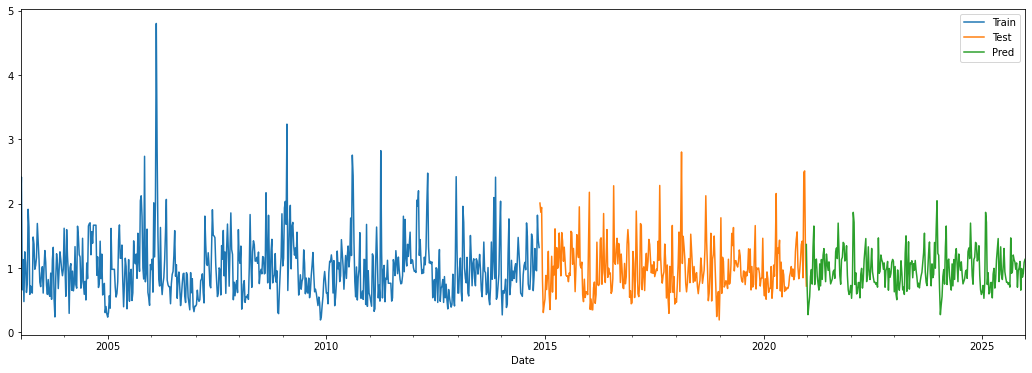

In [ ]:
fitted_model = ExponentialSmoothing(train1_df['w_i'], seasonal_periods=158, trend='add',seasonal='mul').fit()
test_predictions = fitted_model.forecast(312)
pred_for = fitted_model.predict(start='2020-12-27', end='2025-12-28')

train_df['w_i'].plot(legend=True, label='Train')
test_df['w_i'].plot(legend=True, label= 'Test', figsize = (18,6))
pred_for.plot(legend=True, label= 'Pred')



In [ ]:
df.tail()

,Conc,w_i,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
Date,,,,,,,
2020-11-29,16.000000,0.849516,1.001656,1.189012,1.176548,1.165517,1.152338
2020-12-06,46.857143,2.487869,0.995317,1.115676,1.097486,1.067090,1.050822
2020-12-13,47.285714,2.510624,1.057506,1.412087,1.408462,1.475632,1.504095
2020-12-20,21.571429,1.145330,1.118053,1.649385,1.652849,1.690494,1.779860
2020-12-27,13.571429,0.720572,1.119189,1.540503,1.531012,1.478426,1.425264


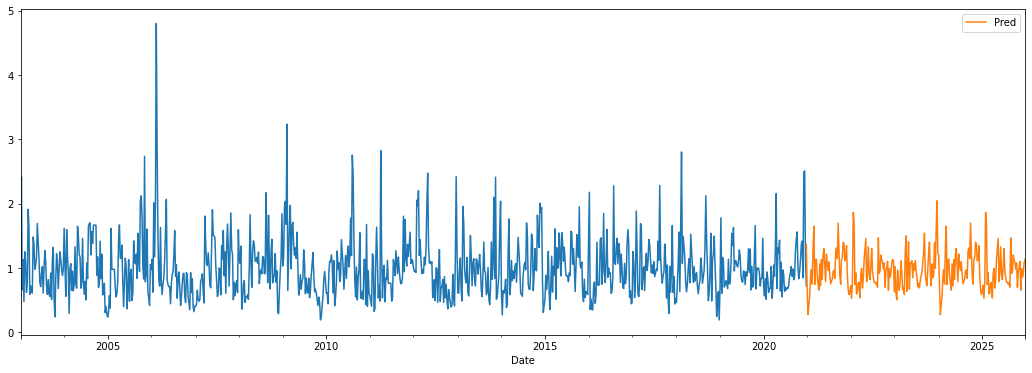

In [ ]:
df['w_i'].plot(figsize = (18,6))
pred_for.plot(legend=True, label= 'Pred')

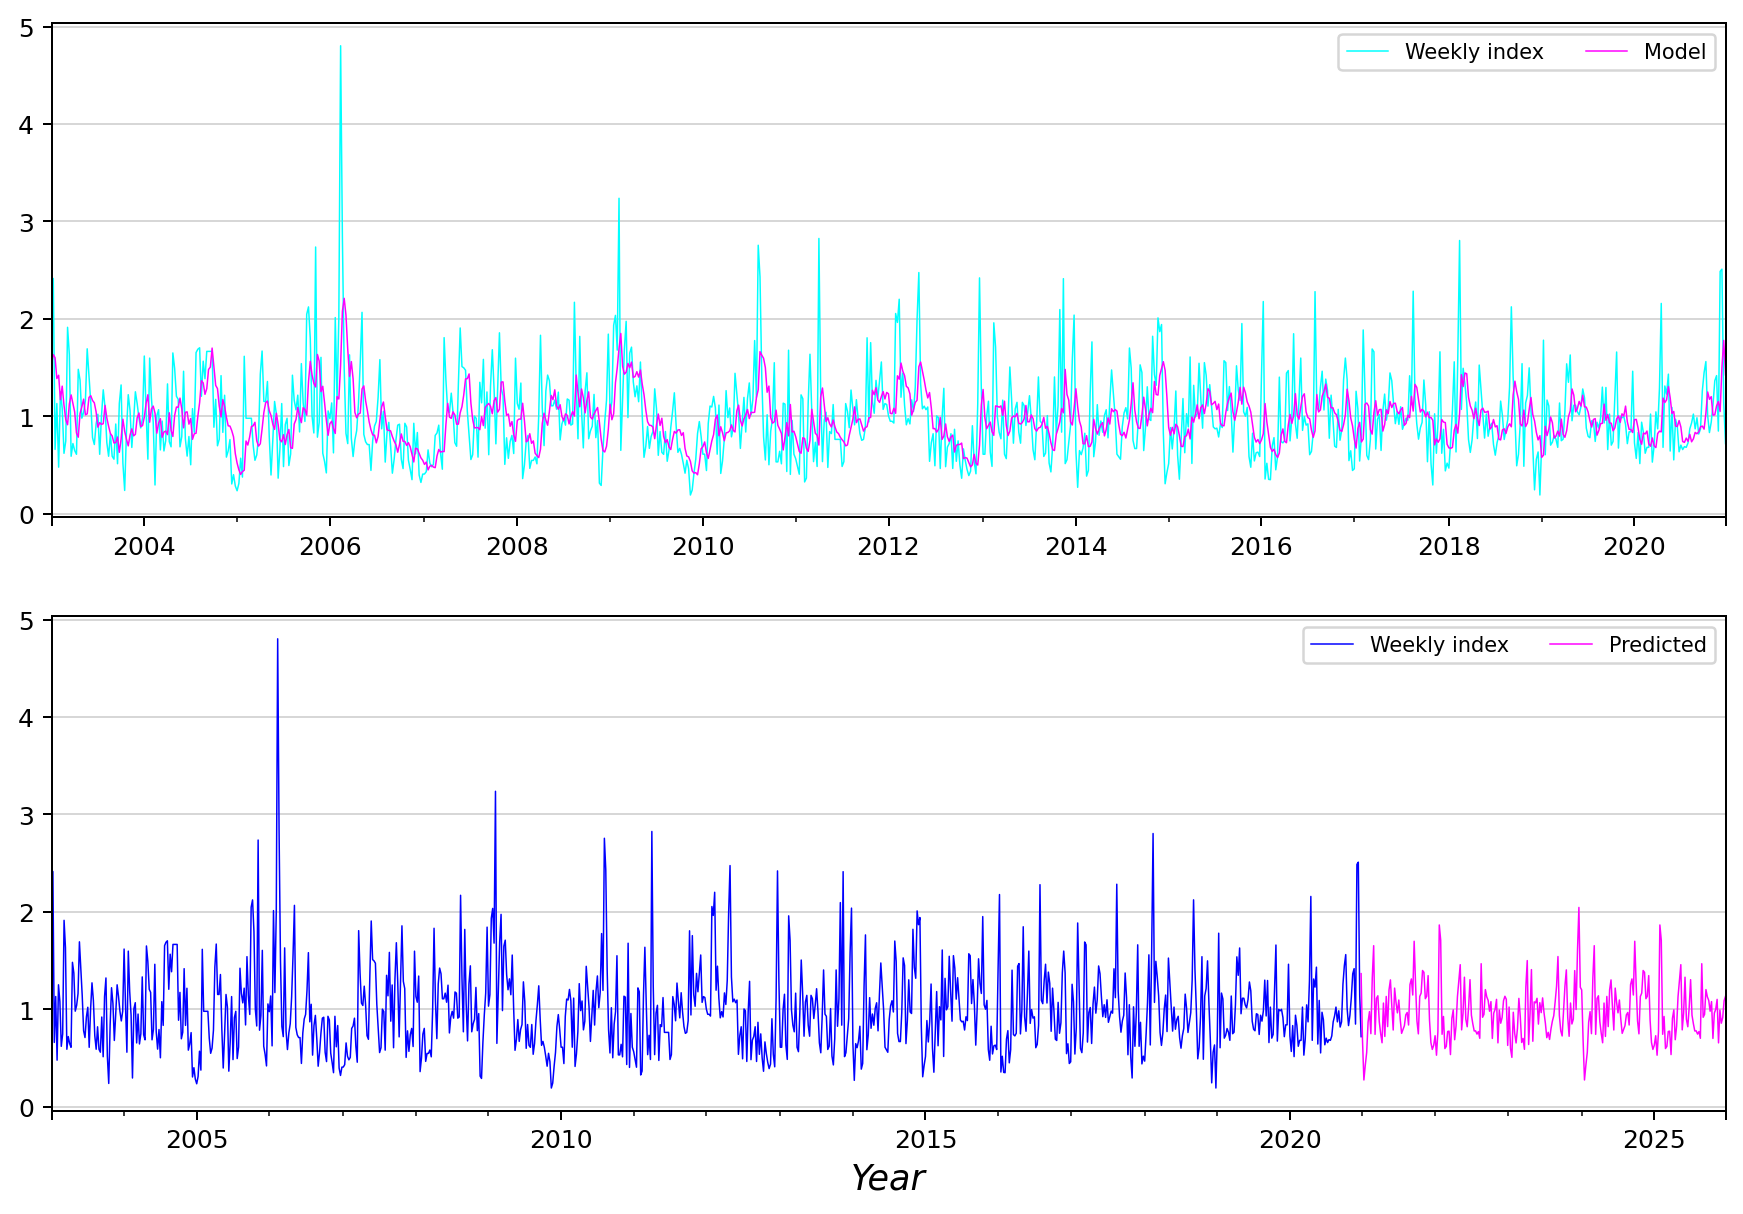

In [103]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (12,8), dpi=180)
df['w_i'].plot(ax=ax1,
               linewidth = 0.6,
               color = 'cyan')
df['HWES3_MUL'].plot(ax=ax1,
                     linewidth = 0.6,
                     color='magenta')
ax1.set_xlabel('')
ax1.legend(labels=["Weekly index","Model"], fontsize = 'small', loc = 1, ncol = 2)
ax1.grid(axis = 'y', alpha =0.5)
df['w_i'].plot(ax=ax2,
               linewidth = 0.6,
               color = 'blue')
pred_for.plot(ax=ax2, 
              linewidth = 0.6,
              color='magenta')
ax2.set_xlabel('Year',
               fontsize = 14,
               fontstyle='oblique',
               fontweight = 'medium')
ax2.grid(axis='y', alpha = 0.5)
ax2.legend(labels=["Weekly index","Predicted"], fontsize = 'small', loc = 1, ncol = 2)
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data for JER/fig8.png', dpi = 180)
plt.show()

# **ARIMA (Autoregressive Integrated Moving Average)**